# [Linear and Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html#estimation-algorithms)

* Classifiers with closed form solution
* Simple: multiclass & no hyperparameters
* Linear and quadratic decision bounds
* `LinearDiscriminantAnalysis` can be used for dimensionality reduction and is available in the `.transform` method
* `QDA` is eqiuvalent to `naive_bays.GaussianNB` if the inputs are conditionally independend in each class
* Regularization/Shrinkage can be used to improve the generalization performance of the classifier
    * set solver to `lsqr` or `eigen`
    * set shrinkage to `auto`


## [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
* Classification (`SVC`, `NuSVC`, `LinearSVC`), regression, outliers detection
* Support vectors -> subset of training points within the margin (`.support_vectors_`). Cost function for building the model does not care about training points that lie on or beyond the margin.
    * Margin: D(decision boudary, closest data points of each class), Goal -> maximize the margin (larger margin, better generalization)
    * Deicion boundary: plane separating different classes
* good where n features > n samples 
* They can handle non-linear decision bounds - so they are good for classifying complex data
* Binary and Multi-class classification: one-versus-one for multi-class classification - binary classifier for every possible pair of classes
* `SVC`, `NuSVC`: one-vs-one and then map to one-vs-rest with `decsiion_function` for per-class score
* Scores are scaled with the Platt method (logit + cross-validation), but this has *limitations*
    * Computationally expensive -> Kernel choice for optimization
    * probability estimates can be incosistent with the scores (`predict` gives positive class even if `.predict_proba` < threshold)
    * "theoretical issues"
* has `class_weight` and `sample_weicth` method to deal with imbalance
* Regularization is present
* *Data has to be scaled!*
* Outlier detection `OneClassSVM` -> unsupervised learning


## [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/sgd.html#stochastic-gradient-descent)
* A way to fit a model, such as linear classifiers & regressors (eg linear SVM, logit)
* Efficient (fast) in large scale (>10k) and spare matrix ML problems, like text classification or NLP
* Allows code tuning (from scratch), but requires hyperparameters
* **Requires features caling!**
* Training data needs to be shuffled
* Regularization: good for >10k samples, otherwiase use Ridge, Lasso, ElasticNet
* `early_stopping` -> True: train/test split, False: all data
* For multi-class classification, a “one versus all” approach is used.


## [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
* unsupervised and supervised neighbors-based learning
* classification & regression
* Find n closest instances to the new point and predict label from these
    * kNN -> k nearest, user defined
    * Number ased on local density -> radius-based
* Classification: non-generalizing ML model -> "stores" all training data & does not generlaize. A new point is then assigned based on the training data
* Efficient when decision boundary is very irregular
* **Unsupervised** NN: 
    * brute-force `sklearn.metrics.pairwise`: Distance of all pairs
    * `KDTree`: if point A is very distant from point B, and point B is very close to point C, then we know that points A and C are very distant.
    *`BallTree`: recursively divides data into nodes defined by a centroid of radius r
* Best in small or medimum sized data
* Nearest Neighbors Regression use-cases
    * Impute missing values
    * time series forecasting
    * geographical/spatial data


SVM vs kNN
- KNN can handle <span style="color:#1df5b4;">sparse data</span> well since it directly considers the distance between data points. SVM, particularly with linear kernels, may struggle in high-dimensional spaces due to the curse of dimensionality, leading to overfitting or suboptimal decision boundaries. 
- KNN's instance-based approach allows it to leverage <span style="color:#1df5b4;">local</span> structures in sparse data effec KNN is particularly effective when local neighborhoods carry significant information about class membership. In image recognition, slight variations in pixel values may lead to different classes, and KNN can capture these local nuances. SVM, in such cases, might form more global boundaries that overlook fine-grained local patterns.
- KNN can effectively <span style="color:#1df5b4;">impute</span> missing values based on the nearest neighbors, allowing for flexible data handling. 
- SVM is effective in <span style="color:#1df5b4;">high-dimensional</span> spaces due to its focus on maximizing the margin between classes. KNN can struggle with the curse of dimensionality, where all points seem equidistant,
- SVM works on the principle of maximizing the margin and has well-defined theoretical foundations that help with <span style="color:#1df5b4;">generalization</span>
- SVM can be adapted to <span style="color:#1df5b4;">multi-class</span> classification effectively through strategies like “one-vs-one” or “one-vs-all.” These adaptations can lead to good performance even in multi-class settings. KNN, although it can also handle multi-class problems, may become computationally expensive as the number of classes increases because it needs to consider multiple neighbors for each prediction



## [Gaussian Process](https://scikit-learn.org/stable/modules/gaussian_process.html)
* nonparametric supervised learning method used to solve regression and classification problems.
* cannot handle sparse features and is not good with n features > 12
* probabilistic: gives a uncertainty for eaqch prediction
* non-parametric->more flexibility

## [Cross decomposition](https://scikit-learn.org/stable/modules/cross_decomposition.html)
* dimensionality reduction and regression, belonging to the “Partial Least Squares” family.
* dealing with high-dimensional data, allowing for effective dimensionality reduction and pattern recognition while also accounting for class labels in the data.
* include Principal Component Analysis (PCA) and Partial Least Squares (PLS).

## [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
*  algorithms based on applying Bayes’ theorem
* good for document classification and spam filtering, not good for probability estimations
* require a small amount of training data to estimate the necessary parameters
* very fast

## [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
* Pro
    * the deeper the tree, the more complex the decision rules and the fitter the model.
    * does **not** need normalization 
    * Can handle missing values (`splitter = 'best'`). For `DecisionTreeClassifier` and `DecisionTreeRegressor`, missing values are classified in the same classes as training data. If no missing values during training it goes to the child with most samples. For `ExtraTreeClassifier` and `ExtraTreeRegregressor` missing values are split randomly
    * can handle numeric, categorical (not in sklearn though) and sparse data
    * can handle multi-output problems and provide class probabilities
    * results can be interpreted and visualized
* Con
    * overfitting (avoid by prunin, min # samples, small tree depth)
    * unstable with small variations in data -> use in ensemble
    * predictions are not smooth or continuous, but stepwise
    * can prioritized dominating classes -> balance data beforehand
    * tends to overfit on data with large number of features -> do feature selection (or PCA, ICA) beforehand
* Tips
    * Start witha shallow tree (`max_depth` = 3) and then increase
    * required n samples per depth doubles for each depth, use the `max_depth` to prevent overfitting
    * `min_samples_split` or `min_samples_leaf` to ensure that multiple samples inform every decision in the tree. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try `min_samples_leaf=5` as an initial value. 
    * balance data before training
    * input data fromat matters for speed an memory. if not `np.float32` a copy will be made, if data is sparse, use `csc_matrix`

* visualize with `.plot_tree()`

Matplotlib is building the font cache; this may take a moment.


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

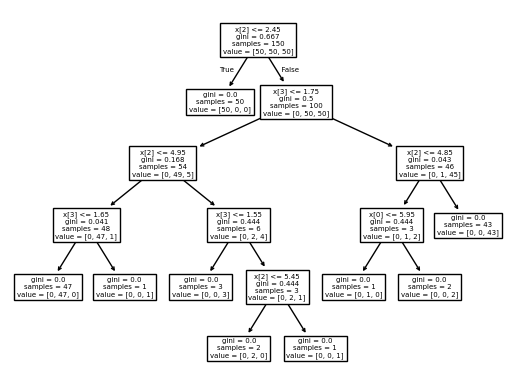

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

## [Ensembles](https://scikit-learn.org/stable/modules/ensemble.html)
* <span style="color:#1df5b4;">**Gradient boosted trees**</span>: 

NEXT: https://scikit-learn.org/stable/modules/ensemble.html
